In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mise en place  de l'environnement de travail




In [3]:
# Bibliothèques standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Préparation des données
from sklearn.model_selection import train_test_split
from collections import Counter

# Feature Importance
import shap


# Divers
import warnings
warnings.filterwarnings('ignore')

In [4]:
path_df = '/content/drive/My Drive/Projets Master/Projet 7/X_test_x_train/df.csv'
df = pd.read_csv(path_df)
print("df shape:", df.shape)

df shape: (307511, 24)


In [5]:
df_sample, _ = train_test_split(df, train_size=1500, stratify=df.TARGET)

print('df', Counter(df.TARGET))
print('df_sample', Counter(df_sample.TARGET))

df Counter({0: 282686, 1: 24825})
df_sample Counter({0: 1379, 1: 121})


In [6]:
df.head(2)


,SK_ID_CURR,EXT_SOURCE_2,taille_famille,anciennete_entreprise,age_client,taux_endettement,total_revenus,montant_credit,nb_demande_pret_precedente,montant_demande_pret_precedente,...,NUM_INSTALMENT_NUMBER,montant_paye_vs_du,days_past_due,DAYS_CREDIT,AMT_CREDIT_SUM,bureau_credit_actif_Closed,bureau_credit_type_Credit_card,solde_credit_bureau_statut_closed,CNT_INSTALMENT,TARGET
0,100002,0.262949,0,1,0,1,3,1,1.0,179055.0,...,190.0,100.0,0.105263,2.375,865055.565,6.0,4.0,23.0,24.000000,1
1,100003,0.622246,1,2,2,1,4,4,3.0,484191.0,...,127.0,100.0,0.000000,3.750,1017400.500,3.0,2.0,0.0,10.107143,0


In [7]:
# Analyse des clients avec une Target = 1

test = df_sample[df_sample['TARGET']== 1]
test

,SK_ID_CURR,EXT_SOURCE_2,taille_famille,anciennete_entreprise,age_client,taux_endettement,total_revenus,montant_credit,nb_demande_pret_precedente,montant_demande_pret_precedente,...,NUM_INSTALMENT_NUMBER,montant_paye_vs_du,days_past_due,DAYS_CREDIT,AMT_CREDIT_SUM,bureau_credit_actif_Closed,bureau_credit_type_Credit_card,solde_credit_bureau_statut_closed,CNT_INSTALMENT,TARGET
78923,191487,0.161590,3,1,1,1,1,1,2.0,133965.000000,...,1064.0,95.899865,0.037736,1.400000,907529.085,7.0,2.0,57.0,5.272727,1
66304,176899,0.699060,1,1,2,2,3,4,2.0,231572.250000,...,313.0,95.994628,0.000000,2.875000,2833151.400,5.0,2.0,0.0,24.000000,1
90537,205112,0.575946,1,2,0,3,2,2,1.0,41400.000000,...,21.0,100.000000,0.000000,5.000000,0.000,1.0,0.0,5.0,6.000000,1
125632,245683,0.000940,0,0,4,1,1,1,13.0,85098.461538,...,2425.0,98.956589,0.012821,1.666667,474817.500,1.0,1.0,14.0,29.526316,1
201900,334036,0.652081,2,4,1,2,3,1,7.0,66584.571429,...,902.0,82.827141,0.038961,5.000000,549765.000,1.0,0.0,0.0,11.275362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44572,151636,0.666627,1,1,1,3,3,4,10.0,174096.000000,...,44.0,77.721319,0.000000,3.500000,8598232.080,3.0,0.0,64.0,7.538462,1
121528,240891,0.683263,0,3,1,2,1,1,5.0,63527.400000,...,385.0,74.729110,0.000000,8.000000,43515.000,2.0,0.0,0.0,10.596491,1
182995,312100,0.651828,2,1,1,1,3,1,10.0,327342.600000,...,4170.0,99.621296,0.025157,0.750000,1745293.680,1.0,1.0,0.0,42.000000,1
219856,354702,0.595086,2,1,0,1,2,1,4.0,71794.125000,...,21.0,100.000000,0.000000,1.500000,2357022.150,3.0,1.0,44.0,9.428571,1


In [8]:
# Importation du modèle
save_path = '/content/drive/My Drive/Projets Master/Projet 7/model_streamlit.pkl'
with open(save_path, 'rb') as f2:
    grid_lgbm = pickle.load(f2)

In [9]:
df_sample_target = df_sample.TARGET
df_sample.drop(columns='TARGET', inplace=True)
df.drop(columns='TARGET', inplace=True)


# Utilisation de la librairie SHAP pour les analyses de nos résultats

**Définition de la Bibliothèque SHAP**

SHAP (SHapley Additive exPlanations) est une bibliothèque Python qui implémente une méthode d'interprétation de modèles de machine learning basée sur la théorie des jeux coopératifs. Elle est conçue pour expliquer l'effet de chaque caractéristique sur la prédiction d'un modèle, en utilisant les valeurs de Shapley – un concept de la théorie des jeux qui attribue une valeur à chaque joueur selon sa contribution à un jeu coopératif.

**Utilité de SHAP**

SHAP est utilisée pour:
- **Décoder les prédictions des modèles complexes**: Elle aide à comprendre les contributions individuelles des différentes caractéristiques à la prédiction finale, pour un échantillon donné.
- **Améliorer la transparence des modèles de machine learning**: En fournissant des explications détaillées sur la manière dont les différentes caractéristiques influencent les prédictions, SHAP rend les modèles complexes plus transparents.
- **Diagnostiquer les comportements des modèles**: En identifiant comment chaque caractéristique affecte la prédiction, les utilisateurs peuvent identifier d'éventuels biais ou erreurs dans les données ou dans le modèle.

**Avantages de SHAP dans les études de Machine Learning**

1. **Interprétabilité améliorée**: SHAP fournit des visualisations et des métriques qui clarifient le rôle de chaque caractéristique dans les prédictions du modèle, rendant même les modèles les plus complexes compréhensibles pour les utilisateurs finaux.
2. **Justification des décisions**: Pour les applications critiques comme la finance ou la santé, SHAP aide à justifier les décisions automatisées prises par les modèles, ce qui est crucial pour la conformité réglementaire et la confiance des utilisateurs.
3. **Développement de modèles équitables**: En mettant en lumière comment et pourquoi les prédictions sont faites, SHAP peut aider à détecter et à corriger les biais dans les modèles.
4. **Flexibilité et compatibilité**: SHAP supporte de nombreux types de modèles de machine learning, y compris les forêts aléatoires, les boostings, les SVM, les réseaux de neurones, et plus encore, ce qui en fait un outil polyvalent pour de nombreuses applications.

En résumé, SHAP est un outil puissant pour l'analyse et l'amélioration de la transparence des modèles de machine learning, permettant aux utilisateurs de mieux comprendre et de faire confiance aux décisions prises par les algorithmes automatisés.


In [32]:
# Feature importance
explainer_shap = shap.TreeExplainer(grid_lgbm)

shap_values_lgb = explainer_shap.shap_values(df_sample)
shap_values_lgb_df = explainer_shap.shap_values(df)


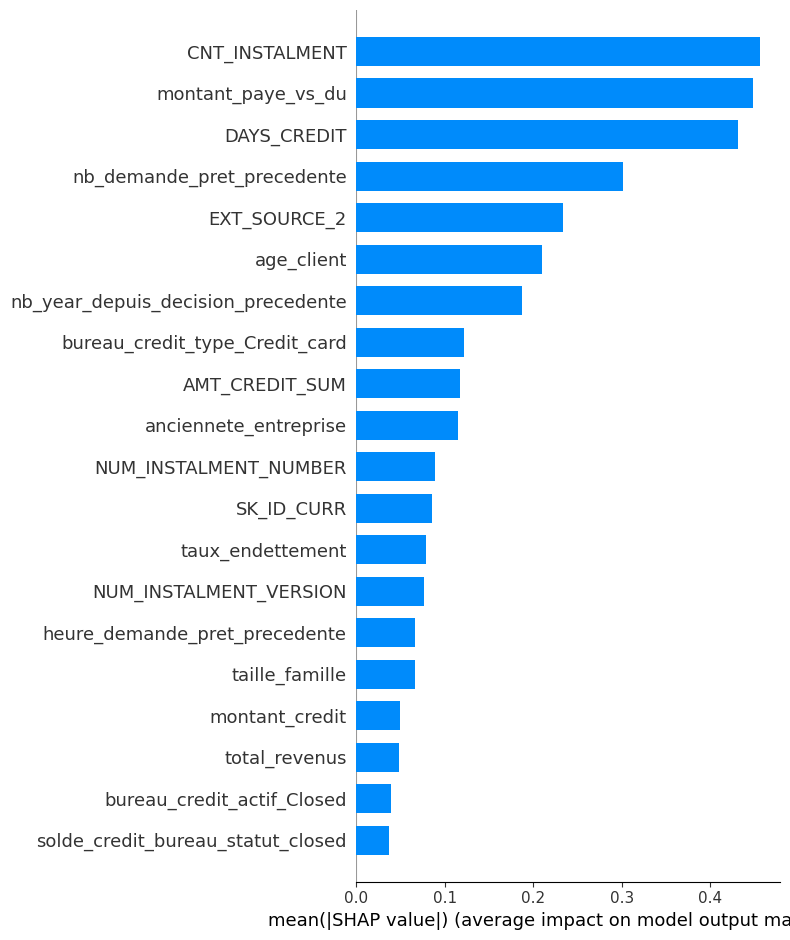

In [33]:

shap.summary_plot(shap_values_lgb, df, plot_type="bar")

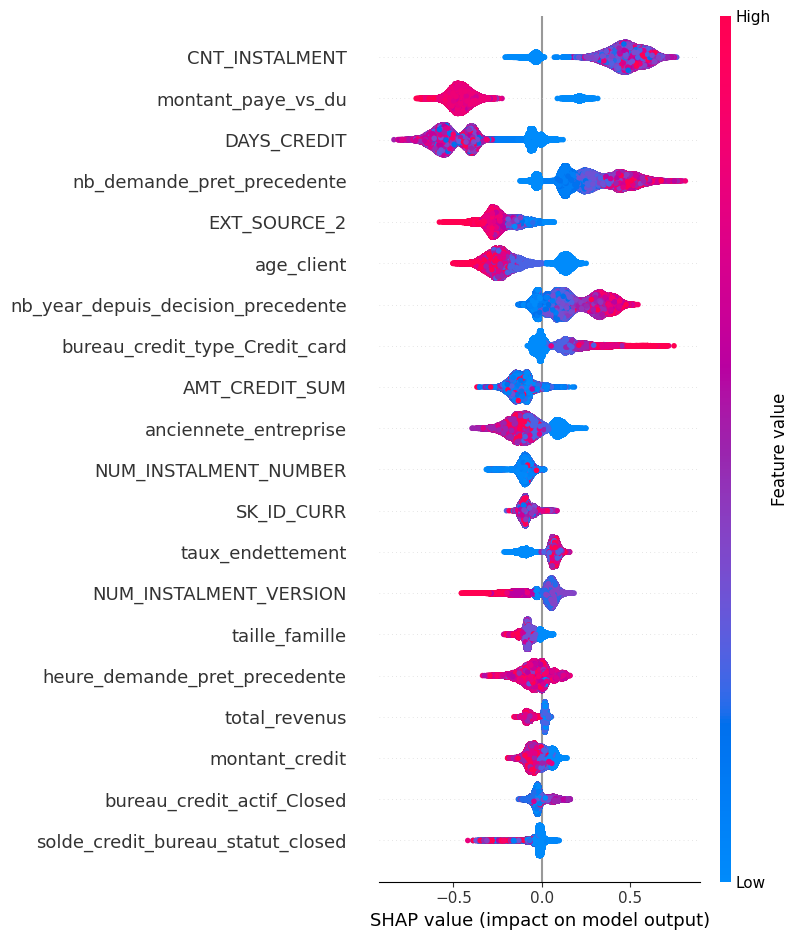

In [51]:
f = plt.figure()
shap.summary_plot(shap_values_lgb_df, df)


In [35]:
print(type(shap_values_lgb_df))  # Vérifie le type de l'objet
print(len(shap_values_lgb_df))  # Si c'est une liste, combien d'éléments elle contient
print(np.array(shap_values_lgb_df).shape)  # Si c'est un tableau, quelle est sa forme


<class 'numpy.ndarray'>
307511
(307511, 23)


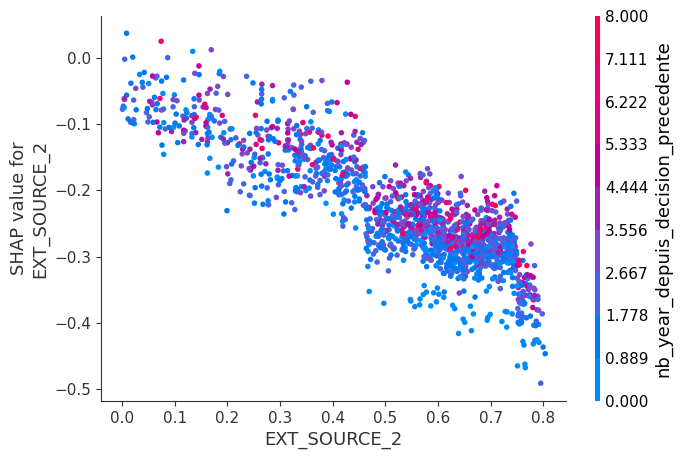

In [36]:
import shap

shap.dependence_plot('EXT_SOURCE_2', shap_values_lgb, df_sample)


# Analyse target  target==1

In [37]:
index1500 = [i for i in range(0,1500)]


In [38]:
df_sample.index = index1500
df_sample_target.index = index1500

In [39]:
pd.DataFrame(shap_values_lgb[1]).to_csv('feature_importance.csv')


In [40]:
d_feats = pd.read_csv('feature_importance.csv', index_col=0)


In [41]:
df_sample.head(2)

,SK_ID_CURR,EXT_SOURCE_2,taille_famille,anciennete_entreprise,age_client,taux_endettement,total_revenus,montant_credit,nb_demande_pret_precedente,montant_demande_pret_precedente,...,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,montant_paye_vs_du,days_past_due,DAYS_CREDIT,AMT_CREDIT_SUM,bureau_credit_actif_Closed,bureau_credit_type_Credit_card,solde_credit_bureau_statut_closed,CNT_INSTALMENT
0,218913,0.673977,0,4,3,3,0,2,1.0,27751.5,...,1.0,21.0,100.0,0.166667,3.500000,414000.00,1.0,1.0,0.0,6.0
1,365104,0.661539,2,2,3,0,2,0,0.0,0.0,...,0.0,0.0,0.0,0.000000,2.888889,1437258.33,4.0,3.0,0.0,0.0


In [42]:
selected_rows = df_sample[df_sample.SK_ID_CURR == 218913	]
if not selected_rows.empty:
    i = selected_rows.index.values[0]
    print(i)
    shap.initjs()
else:
    print("Aucune ligne ne correspond à la condition donnée")

0


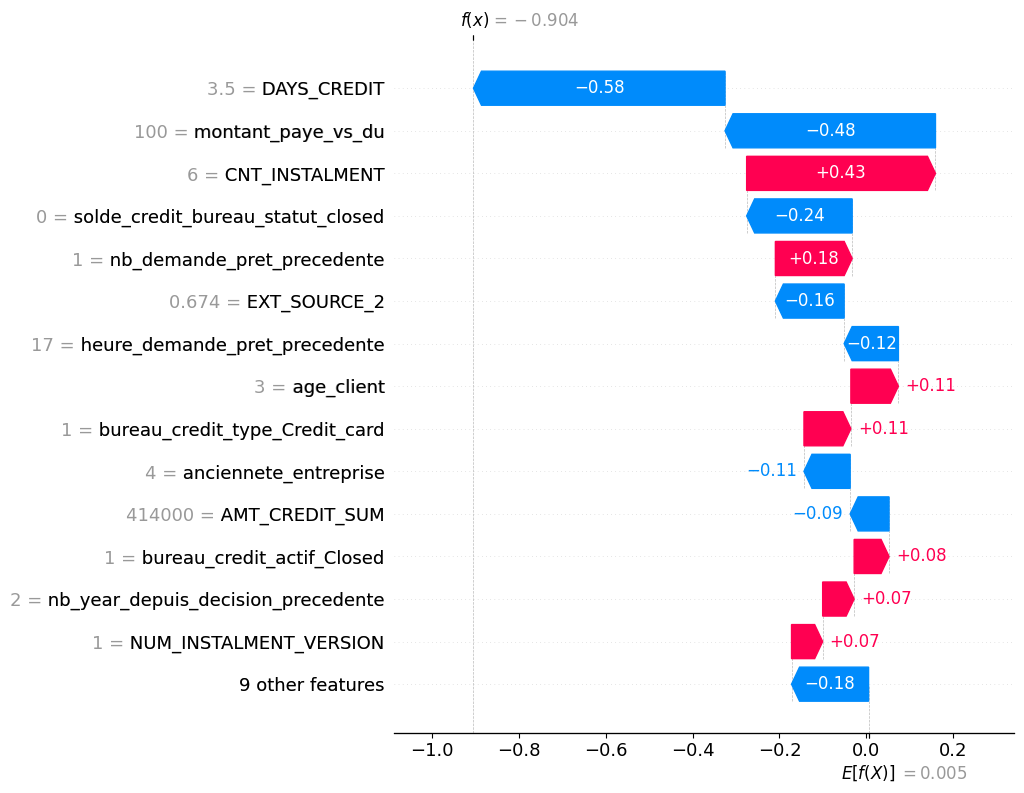

In [43]:
# Sélection d'une ligne spécifique (par exemple, la première ligne)
i = 0  # Vous pouvez changer cet index pour choisir une autre ligne
shap_values_row = shap_values_lgb_df[i, :]  # Prenez les valeurs SHAP pour la ligne `i`

# Créez un objet shap.Explanation
shap_object = shap.Explanation(
    base_values=explainer_shap.expected_value,  # Utilise la valeur de base (si vous avez plusieurs classes, utilisez expected_value[1] pour la classe positive)
    values=shap_values_row,  # Les valeurs SHAP pour l'exemple
    feature_names=df_sample.columns,  # Les noms des features
    data=df_sample.iloc[i, :]  # Les valeurs brutes des features pour cet exemple
)

# Générer le graphe en cascade (waterfall plot)
shap.waterfall_plot(shap_object, max_display=15)



In [44]:
# Création d'un DataFrame à partir des valeurs SHAP et des noms des features

df_shap = pd.DataFrame(shap_object.values,shap_object.feature_names)

In [45]:
# Renommage de la colonne contenant les valeurs SHAP

df_shap.columns = ["shap_values"]


In [46]:
# Création d'une nouvelle colonne contenant les valeurs absolues des valeurs SHAP

df_shap['shap_abs'] = df_shap['shap_values'].apply(np.abs)


In [47]:
# Tri du DataFrame par les valeurs absolues des SHAP en ordre décroissant et affichage des 10 premières lignes

df_shap.sort_values(by='shap_abs', ascending=False).head(10)


,shap_values,shap_abs
DAYS_CREDIT,-0.579049,0.579049
montant_paye_vs_du,-0.484375,0.484375
CNT_INSTALMENT,0.434635,0.434635
solde_credit_bureau_statut_closed,-0.242919,0.242919
nb_demande_pret_precedente,0.176796,0.176796
EXT_SOURCE_2,-0.158310,0.158310
heure_demande_pret_precedente,-0.124892,0.124892
age_client,0.109403,0.109403
bureau_credit_type_Credit_card,0.107977,0.107977
anciennete_entreprise,-0.106357,0.106357


# Analyse pour TARGET = 0


In [48]:
i = 100  # Indice de la ligne à expliquer

shap.initjs()  # Initialise l'environnement pour les graphiques interactifs

# Vérifiez si vous travaillez avec un seul ensemble de valeurs SHAP
shap.force_plot(
    explainer_shap.expected_value,  # Utilisez expected_value sans index [1] si une seule classe
    shap_values_lgb[i],  # Prenez directement les valeurs SHAP pour l'instance `i`
    df_sample.iloc[i, :]  # Données brutes pour la ligne `i`
)


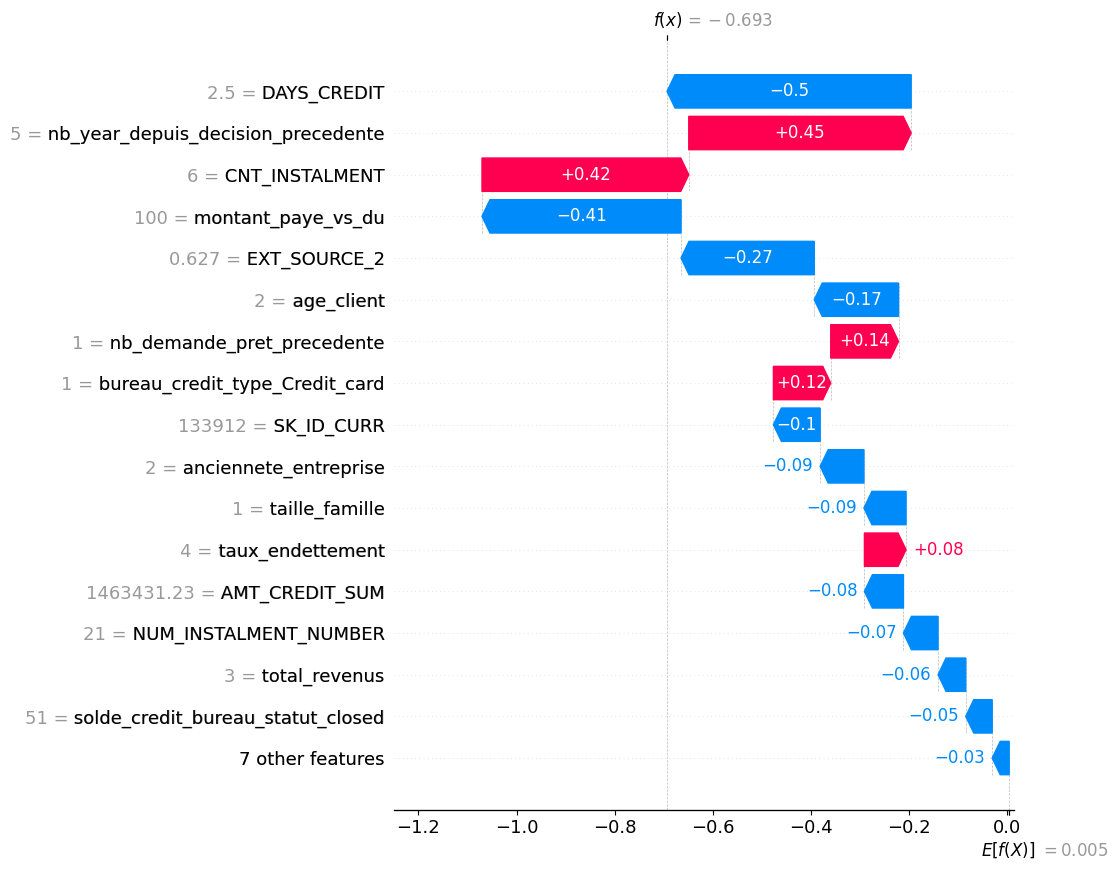

In [49]:
# Création d'un objet shap.Explanation directement
shap_object = shap.Explanation(
    base_values=explainer_shap.expected_value,  # La valeur de base (expected_value)
    values=shap_values_lgb[i],  # Les valeurs SHAP pour la ligne `i`
    feature_names=df_sample.columns,  # Les noms des colonnes/features
    data=df_sample.iloc[i, :]  # Les valeurs brutes des features pour la ligne `i`
)

# Génération du graphique en cascade (waterfall plot)
shap.waterfall_plot(shap_object, max_display=17)


**Interprétation du graphique Waterfall des valeurs SHAP**

Ce graphique montre comment chaque feature contribue à la prédiction du modèle pour une observation spécifique. Voici les points principaux à noter :

1. **Valeur de base (base value)** :
   - La valeur de base indiquée par `E[f(x)]` représente la moyenne des prédictions du modèle sur l'ensemble des données.
   - Pour cette instance, la valeur de base est `0.005`, ce qui correspond à la probabilité moyenne d'appartenir à la classe positive (par exemple, la classe "défaut de paiement").

2. **Prédiction individuelle (f(x))** :
   - La prédiction spécifique pour cette observation est `-0.477`, ce qui est significativement inférieur à la valeur de base. Cela suggère que le modèle prédit avec confiance que l'individu **n'est pas en difficulté de paiement**.

3. **Contribution des features (SHAP values)** :
   - Les **barres rouges** représentent les contributions positives, augmentant la probabilité de la classe "difficulté de paiement".
   - Les **barres bleues** représentent les contributions négatives, réduisant la probabilité de la classe "difficulté de paiement".

4. **Features principales influençant la prédiction** :
   - Les trois features les plus influentes sont :
     - **CNT_INSTALMENT** : Contribue de manière significative (+0.47) à augmenter la probabilité de difficulté de paiement.
     - **montant_paye_vs_du** : Diminue de manière égale (-0.47) cette probabilité.
     - **nb_year_depuis_decision_precedente** : Ajoute une contribution notable (+0.41) en faveur de la difficulté de paiement.
   - D'autres features importantes incluent :
     - **DAYS_CREDIT** : Diminue fortement (-0.37) la probabilité.
     - **EXT_SOURCE_2** : Diminue modérément (-0.24) la probabilité.
     - **nb_demande_pret_precedente** : Augmente légèrement (+0.24) la probabilité.

5. **Rang des features restantes** :
   - Les contributions des autres features sont plus faibles et se combinent pour influencer la prédiction finale, mais elles jouent un rôle moins significatif que celles mentionnées ci-dessus.

6. **Conclusion** :
   - Le modèle prédit que cet individu **n'est pas en difficulté de paiement** avec une prédiction nette de `-0.477`.
   - Les principales variables influençant cette décision sont **CNT_INSTALMENT**, **montant_paye_vs_du**, et **nb_year_depuis_decision_precedente**.
   - Les valeurs SHAP permettent de décomposer la prédiction et d'expliquer comment chaque feature contribue à la décision du modèle, offrant une transparence essentielle pour les systèmes critiques comme l'évaluation du risque de crédit.

Ce type d'analyse est crucial pour comprendre les décisions du modèle et justifier les prédictions dans un contexte de modélisation du risque de défaut.
